<a href="https://colab.research.google.com/github/maciejlehmann/amw-wdum/blob/main/Lab10/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# I/O-Bound Synchronous Version

import requests
import time


def download_site(url, session):
    with session.get(url) as response:
        print(f"Read {len(response.content)} from {url}")


def download_all_sites(sites):
    with requests.Session() as session:
        for url in sites:
            download_site(url, session)


if __name__ == "__main__":
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80
    start_time = time.time()
    download_all_sites(sites)
    duration = time.time() - start_time
    print(f"Pobrano {len(sites)} stron w {duration} sekund")

Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jyth

In [ ]:
# I/O-Bound threading Version

import concurrent.futures
import requests
import threading
import time


thread_local = threading.local()


def get_session():
    if not hasattr(thread_local, "session"):
        thread_local.session = requests.Session()
    return thread_local.session


def download_site(url):
    session = get_session()
    with session.get(url) as response:
        print(f"Read {len(response.content)} from {url}")


def download_all_sites(sites):
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        executor.map(download_site, sites)


if __name__ == "__main__":
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80
    start_time = time.time()
    download_all_sites(sites)
    duration2 = time.time() - start_time
    print(f"Pobrano {len(sites)} stron w {duration2} sekund")

Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 277 from http://olympus.realpython.org/dice
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 277 from

In [ ]:
# I/O-Bound asyncio Version

import asyncio
import time
import aiohttp
import nest_asyncio
nest_asyncio.apply()

async def download_site(session, url):
    async with session.get(url) as response:
        print("Read {0} from {1}".format(response.content_length, url))


async def download_all_sites(sites):
    async with aiohttp.ClientSession() as session:
        tasks = []
        for url in sites:
            task = asyncio.ensure_future(download_site(session, url))
            tasks.append(task)
        await asyncio.gather(*tasks, return_exceptions=True)


if __name__ == "__main__":
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80
    start_time = time.time()
    asyncio.get_event_loop().run_until_complete(download_all_sites(sites))
    duration3 = time.time() - start_time
    print(f"Pobrano {len(sites)} stron w {duration3} sekund")


Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 fr

In [ ]:
# I/O-Bound multiprocessing Version

import requests
import multiprocessing
import time

session = None


def set_global_session():
    global session
    if not session:
        session = requests.Session()


def download_site(url):
    with session.get(url) as response:
        name = multiprocessing.current_process().name
        print(f"{name}:Read {len(response.content)} from {url}")


def download_all_sites(sites):
    with multiprocessing.Pool(initializer=set_global_session) as pool:
        pool.map(download_site, sites)


if __name__ == "__main__":
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80
    start_time = time.time()
    download_all_sites(sites)
    duration4 = time.time() - start_time
    print(f"Pobrano {len(sites)} stron w {duration4} sekund")

ForkPoolWorker-5:Read 10394 from https://www.jython.org
ForkPoolWorker-6:Read 10394 from https://www.jython.org
ForkPoolWorker-5:Read 277 from http://olympus.realpython.org/dice
ForkPoolWorker-5:Read 10394 from https://www.jython.org
ForkPoolWorker-5:Read 277 from http://olympus.realpython.org/dice
ForkPoolWorker-5:Read 10394 from https://www.jython.org
ForkPoolWorker-5:Read 277 from http://olympus.realpython.org/dice
ForkPoolWorker-5:Read 10394 from https://www.jython.org
ForkPoolWorker-6:Read 277 from http://olympus.realpython.org/dice
ForkPoolWorker-6:Read 10394 from https://www.jython.org
ForkPoolWorker-5:Read 277 from http://olympus.realpython.org/dice
ForkPoolWorker-5:Read 10394 from https://www.jython.org
ForkPoolWorker-6:Read 277 from http://olympus.realpython.org/dice
ForkPoolWorker-6:Read 10394 from https://www.jython.org
ForkPoolWorker-5:Read 277 from http://olympus.realpython.org/dice
ForkPoolWorker-5:Read 10394 from https://www.jython.org
ForkPoolWorker-6:Read 277 from htt

In [ ]:
# CPU-Bound Synchronous Version

import time


def cpu_bound(number):
    return sum(i * i for i in range(number))


def find_sums(numbers):
    for number in numbers:
        cpu_bound(number)


if __name__ == "__main__":
    numbers = [5_000_000 + x for x in range(20)]

    start_time = time.time()
    find_sums(numbers)
    duration5 = time.time() - start_time
    print(f"{duration5} sekund")

9.549305438995361 sekund


In [ ]:
# CPU-Bound multiprocessing Version

import multiprocessing
import time


def cpu_bound(number):
    return sum(i * i for i in range(number))


def find_sums(numbers):
    with multiprocessing.Pool() as pool:
        pool.map(cpu_bound, numbers)


if __name__ == "__main__":
    numbers = [5_000_000 + x for x in range(20)]

    start_time = time.time()
    find_sums(numbers)
    duration6 = time.time() - start_time
    print(f"{duration6} sekund")

10.439566850662231 sekund


I/O-Bound synchronous: 7.5298 s
I/O-Bound threading: 1.5217 s
I/O-Bound asyncio: 0.4554 s
I/O-Bound multiprocessing: 4.8288 s
CPU-Bound synchronous: 9.5493 s
CPU-Bound multiprocessing: 10.4396 s


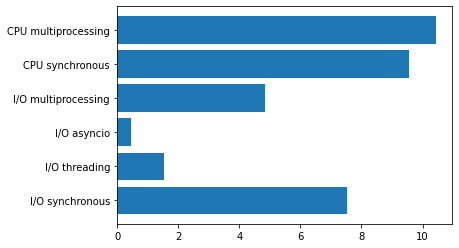

In [ ]:
# Porównanie wyników

import matplotlib.pyplot as plt

print('I/O-Bound synchronous:', round(duration,4), 's')
print('I/O-Bound threading:',round(duration2,4), 's')
print('I/O-Bound asyncio:',round(duration3,4), 's')
print('I/O-Bound multiprocessing:',round(duration4,4), 's')
print('CPU-Bound synchronous:', round(duration5,4), 's')
print('CPU-Bound multiprocessing:', round(duration6,4), 's')

names = ['I/O synchronous', 'I/O threading', 'I/O asyncio', 'I/O multiprocessing', 'CPU synchronous', 'CPU multiprocessing']
values = [duration, duration2, duration3, duration4, duration5, duration6]

plt.barh(names, values)
plt.show()

In [ ]:
# Synchronous

import time
import nest_asyncio
import requests
import json
from urllib import request
import multiprocessing
import asyncio
import aiohttp
from concurrent.futures import ThreadPoolExecutor

def download_images():
    response = requests.get("https://picsum.photos/v2/list")
    if response.status_code != 200:
        raise AttributeError('GET /tasks/ {}'.format(response.status_code))
    data = json.loads(response.text)

    pictures=[]
    for s in data:
        pictures.append(s['download_url']+".jpg")
    return pictures

def saveImages(link):
    filename = link.split('/')[6].split('.')[0]
    fileformat = link.split('/')[6].split('.')[1]
    request.urlretrieve(link, "downloads/{}.{}".format(filename, fileformat))

def main():
    images = download_images()
    for image in images:
        saveImages(image)

start_time = time.time()
main()
duration7 = time.time() - start_time
print(f"Czas potrzebny do pobrania 30 zdjęć: {duration7}")

Czas potrzebny do pobrania 30 zdjęć: 22.5013165473938


In [ ]:
# Multithreading

def process_images_threading():
    images = download_images()
    with ThreadPoolExecutor(max_workers=5) as executor:
        executor.map(saveImages,images)

start_time = time.time()
process_images_threading()
duration8 = time.time() - start_time
print(f"Czas potrzebny do pobrania 30 zdjęć z wykorzystaniem multithreading: {duration8}")

Czas potrzebny do pobrania 30 zdjęć z wykorzystaniem multithreading: 4.958350896835327


In [ ]:
# Multiprocessing

def process_images_multiprocessing():
    images = download_images()
    pool = multiprocessing.Pool(multiprocessing.cpu_count())
    pool.map(saveImages,images)


start_time = time.time()
process_images_multiprocessing()
duration9 = time.time() - start_time
print(f"Czas potrzebny do pobrania 30 zdjęć z wykorzystaniem multiprocessing: {duration9}")

Czas potrzebny do pobrania 30 zdjęć z wykorzystaniem multiprocessing: 11.409286975860596


In [ ]:
# Asyncio

async def download_images_asyncio(link, session):
    filename = link.split('/')[6].split('.')[0]
    fileformat = link.split('/')[6].split('.')[1]
    async with session.get(link) as response:
        with open("downloads/{}.{}".format(filename, fileformat), 'wb') as fd:
            async for data in response.content.iter_chunked(1024):
                fd.write(data)

async def main_asyncio():
    images = download_images()

    async with aiohttp.ClientSession() as session:
        tasks=[download_images_asyncio(image,session)for image in images]
        return await asyncio.gather(*tasks)

start_time = time.time()
nest_asyncio.apply()
asyncio.run(main_asyncio())
duration10 = time.time() - start_time
print(f"Czas potrzebny do pobrania 30 zdjęć z wykorzystaniem asyncio: {duration10}")

Czas potrzebny do pobrania 30 zdjęć z wykorzystaniem asyncio: 1.8221871852874756


Synchronous: 22.5013 s
Multithreading: 4.9584 s
Multiprocessing: 11.4093 s
Asyncio: 1.8222 s


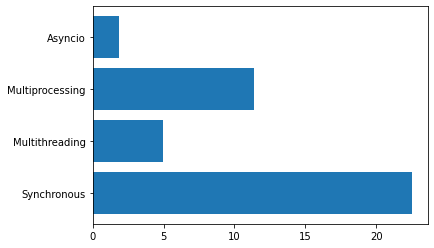

In [ ]:
# Porównanie wyników

import matplotlib.pyplot as plt

print('Synchronous:', round(duration7,4), 's')
print('Multithreading:',round(duration8,4), 's')
print('Multiprocessing:',round(duration9,4), 's')
print('Asyncio:',round(duration10,4), 's')

names = ['Synchronous', 'Multithreading', 'Multiprocessing', 'Asyncio']
values = [duration7, duration8, duration9, duration10]

plt.barh(names, values)
plt.show()